<a href="https://colab.research.google.com/github/nataliaovandof/Evaluacion/blob/main/Evaluacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Evaluación**
Natalia María Ovando Flores A01368118



## ETAPA 1: Preprocesamiento de DATOS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
files.upload()

Saving California_EUA.csv to California_EUA.csv
Saving DF_Mexico.csv to DF_Mexico.csv
Saving Girona_España.csv to Girona_España.csv


In [ ]:
california= pd.read_csv('California_EUA.csv', encoding = 'unicode_escape')
df= pd.read_csv('DF_Mexico.csv')
girona= pd.read_csv('Girona_España.csv', encoding = 'unicode_escape')

### Reemplazar Valores Nulos


#### California

In [ ]:
california.info()

Voy a dividir mis datos en datos númericos y en strings para manipulación más sencilla.

In [ ]:
california_string = california.select_dtypes(include=['object'])
california_float = california.select_dtypes(include=['float'])
california_int = california.select_dtypes(include=['int64'])

california_num = pd.concat([california_float, california_int], axis=1)

In [ ]:
valores_nulos=california_num.isnull().sum()
valores_nulos

In [ ]:
valores_nulos=california_string.isnull().sum()
valores_nulos

Voy a rellenar mis datos númericos con el promedio y mis datos string con un before fill

In [ ]:
california_num=california_num.fillna(round(california_float.mean(),1))
california_string=california_string.fillna(method='bfill')

In [ ]:
valores_nulos=california_num.isnull().sum()
valores_nulos

Vimos tengo columnas que no se rellenaron y aún tengo valores nulos, esas las rellenaré individualmente.

In [ ]:
california_num = california_num.fillna(0)

In [ ]:
valores_nulos=california_num.isnull().sum()
valores_nulos

In [ ]:
valores_nulos=california_string.isnull().sum()
valores_nulos

In [ ]:
california_string = california_string.fillna('--')

In [ ]:
valores_nulos=california_string.isnull().sum()
valores_nulos

#### México DF

In [ ]:
df.info()

In [ ]:
df_string = df.select_dtypes(include=['object'])
df_float = df.select_dtypes(include=['float'])
df_int = df.select_dtypes(include=['int64'])

df_num = pd.concat([df_float, df_int], axis=1)

In [ ]:
valores_nulos=df_num.isnull().sum()
valores_nulos

In [ ]:
valores_nulos=df_string.isnull().sum()
valores_nulos

In [ ]:
df_num=df_num.fillna(round(df_float.mean(),1))
df_string=df_string.fillna(method='bfill')

In [ ]:
valores_nulos=df_num.isnull().sum()
valores_nulos

In [ ]:
df_num = df_num.fillna(0)

In [ ]:
valores_nulos=df_num.isnull().sum()
valores_nulos

In [ ]:
valores_nulos=df_string.isnull().sum()
valores_nulos

In [ ]:
df_string = df_string.fillna('--')

In [ ]:
valores_nulos=df_string.isnull().sum()
valores_nulos

#### Girona

In [ ]:
girona.info()

In [ ]:
girona_string = girona.select_dtypes(include=['object'])
girona_float = girona.select_dtypes(include=['float'])
girona_int = girona.select_dtypes(include=['int64'])

girona_num = pd.concat([girona_float, girona_int], axis=1)

In [ ]:
valores_nulos=girona_num.isnull().sum()
valores_nulos

In [ ]:
valores_nulos=girona_string.isnull().sum()
valores_nulos

In [ ]:
girona_num=girona_num.fillna(round(girona_float.mean(),1))
girona_string=girona_string.fillna(method='bfill')

In [ ]:
valores_nulos=girona_string.isnull().sum()
valores_nulos

In [ ]:
girona_string = girona_string.fillna('--')

In [ ]:
valores_nulos=girona_string.isnull().sum()
valores_nulos

In [ ]:
valores_nulos=girona_num.isnull().sum()
valores_nulos

In [ ]:
girona_num = girona_num.fillna(0)

In [ ]:
valores_nulos=girona_num.isnull().sum()
valores_nulos

### Eliminación de Outliers:  Rango Intercuartílico


#### California
Ahora, para cada dataframe, eliminaremos los datos que sean demasiado extremos para cada dataframe. Para eso visualizaremos nuestra actual distribución de datos. 

Este proceso lo haremos en datos númericos únicamente.

In [ ]:
fig = plt.figure(figsize =(15, 8))
california_num.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe California")
plt.show() 

In [ ]:
y=california_num

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido\n", Limite_Superior_iqr)
print()
print("Limite inferior permitido\n", Limite_Inferior_iqr)

In [ ]:
outliers= california_num[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers

In [ ]:
california_clean= california_num[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
california_clean

In [ ]:
california_clean_final=california_clean.copy()
california_clean_final=california_clean_final.fillna(round(california_clean_final.mean(),1))
california_clean_final

In [ ]:
fig = plt.figure(figsize =(15, 8))
california_clean_final.plot(kind='box', vert=False)
plt.title("Nueva Distribución del Dataframe California")
plt.show()

Como podemos ver, el rango de nuestros datos disminuyó, excepto en el ID, por la naturaleza de este tipo de dato.

#### México

In [ ]:
fig = plt.figure(figsize =(15, 8))
df_num.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe DF")
plt.show() 

In [ ]:
y=df_num

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido\n", Limite_Superior_iqr)
print()
print("Limite inferior permitido\n", Limite_Inferior_iqr)

In [ ]:
outliers= df_num[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers

In [ ]:
df_clean= df_num[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
df_clean

In [ ]:
df_clean_final=df_clean.copy()
df_clean_final=df_clean_final.fillna(round(df_clean_final.mean(),1))
df_clean_final

In [ ]:
fig = plt.figure(figsize =(15, 8))
df_clean_final.plot(kind='box', vert=False)
plt.title("Nueva Distribución del Dataframe México")
plt.show()

#### Girona

In [ ]:
fig = plt.figure(figsize =(15, 8))
girona_num.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe Girona")
plt.show() 

In [ ]:
y=girona_num

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido\n", Limite_Superior_iqr)
print()
print("Limite inferior permitido\n", Limite_Inferior_iqr)

In [ ]:
outliers= girona_num[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers

In [ ]:
girona_clean= girona_num[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
girona_clean

In [ ]:
girona_clean_final=girona_clean.copy()
girona_clean_final=girona_clean_final.fillna(round(girona_clean_final.mean(),1))
girona_clean_final

In [ ]:
fig = plt.figure(figsize =(15, 8))
girona_clean_final.plot(kind='box', vert=False)
plt.title("Nueva Distribución del Dataframe Girona")
plt.show()

Ahora tenemos datos mucho menos extremos, pudiendonos ayudar a acercarnos a una distribución normal. En todos los procesos de manipulación de datos se pierde información, el objetivo es que la información que conservemos sea lo suficientemente representativa para cualquier análisis que querramos hacer.

### Concatenacion Final


In [ ]:
california = pd.concat([california_clean_final, california_string], axis=1)
df = pd.concat([df_clean_final, df_string], axis=1)
girona = pd.concat([girona_clean_final, girona_string], axis=1)

In [ ]:
california.to_csv("california_clean_final.csv")
df.to_csv("df_clean_final.csv")
girona.to_csv("girona_clean_final.csv")

In [ ]:
from google.colab import files 
  
#files.download("california_clean_final.csv")
#files.download("df_clean_final.csv")
#files.download("girona_clean_final.csv")

## ETAPA 2: Extracción  de DATOS

In [112]:
!pip install funpymodeling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.5/215.5 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=a22d906c8235d98ef18ded5ecd325a1b2088e19ec5b04a24431b1796a94adb02
  Stored in directory: /root/.cache/pip/wheels/46/b8/69/4f7789b7d2fc0718a44cbc4ae5d40970a40c22c472ae50f0a1
Successfully built sklearn
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [113]:
from funpymodeling.exploratory import freq_tbl 

In [ ]:
california.columns

### a) host_acceptance_rate> 50%
Aqui tenemos datos numéricos en str, por lo que tenemos que pasar a un dato verdaderamente numérico.

#### California

In [ ]:
aCali= california[california['host_acceptance_rate']>'50%']
aCali['host_acceptance_rate'].min()

#### México

In [ ]:
aMex= df[df['host_acceptance_rate']>'50%']
aMex['host_acceptance_rate'].min() # mostramos el menor valor para confirmar que en la nueva columna el menor dato es menor a 50%

#### Girona

In [ ]:
aGir= girona[girona['host_acceptance_rate']>'50%']
aGir['host_acceptance_rate'].min() # mostramos el menor valor para confirmar que en la nueva columna el menor dato es menor a 50%

En estos dataframe creados podemos tener información de los únicos alojamientos en Airbnb que reciben una tasa de aceptación mayor al 50%, que para un servicio, una tasa de aceptación de solo la mitad, es bastant4e baja.

In [ ]:
aCali.to_csv("aCali.csv")
aMex.to_csv("aMex.csv")
aGir.to_csv("aGir.csv")

#files.download("aCali.csv")
#files.download("aMex.csv")
#files.download("aGir.csv")

### b) Sólo los registros con categoría “superhost”

#### California

In [ ]:
bCali= california[california['host_is_superhost']=='t']
bCali

#### Mexico

In [ ]:
bMex= df[df['host_is_superhost']=='t']
bMex

#### Girona

In [ ]:
bGir= girona[girona['host_is_superhost']=='t']
bGir

En este data frame nos encontramos solo con alojamientos que su host tuvo un desempeño excepcional.

In [ ]:
bCali.to_csv("bCali.csv")
bMex.to_csv("bMex.csv")
bGir.to_csv("bGir.csv")

#files.download("bCali.csv")
#files.download("bMex.csv")
#files.download("bGir.csv")

### c) Los registros que no hallan verificado identidad “ not identity_verified”

#### California

In [ ]:
cCali= california[california['host_identity_verified']=='f']
cCali

#### México

In [ ]:
cMex= df[df['host_identity_verified']=='f']
cMex

#### Girona


In [ ]:
cGir= girona[girona['host_identity_verified']=='f']
cGir

En este dataframe obtenemos solo alojamientos con identidades no verificadas. Significa que estas respuestas son completamente anónimas, y de usuarios que no tienen identidad comprobada por airbnb

In [ ]:
cCali.to_csv("cCali.csv")
cMex.to_csv("cMex.csv")
cGir.to_csv("cGir.csv")

#files.download("cCali.csv")
#files.download("cMex.csv")
#files.download("cGir.csv")

### d) Los registro cuyo property_type = “Private room” y “Hotel room”

#### California
Aqui la variable tiene datos como Room in hotel que seria lo equivalente a Hotel room

In [ ]:
dCali= california[(california['property_type']=='Private room') | (california['property_type']== "Room in hotel")]
dCali

#### México

In [ ]:
dMex= df[(df['property_type']=='Private room') | (df['property_type']== "Room in hotel")]
dMex

#### Girona
Ocurre el mismo caso que en california

In [ ]:
dGir= girona[(girona['property_type']=='Private room') | (girona['property_type']== "Room in hotel")]
dGir

In [ ]:
dCali.to_csv("dCali.csv")
dMex.to_csv("dMex.csv")
dGir.to_csv("dGir.csv")

#files.download("dCali.csv")
#files.download("dMex.csv")
#files.download("dGir.csv")

### e) Los registros que cuenten con bathroom > 1

#### California

In [ ]:
eCali= california[(california['bathrooms_text']!='1 bath') & (california['bathrooms_text']!= "0 baths") & (california['bathrooms_text']!= "0 shared baths") & (california['bathrooms_text']!= "1 private bath") & (california['bathrooms_text']!= "1 shared bath")&(california['bathrooms_text']!= "Half-bath")&(california['bathrooms_text']!= "Shared half-bath")&(california['bathrooms_text']!= "Private half-bath")]
eCali

#### Mexico

In [ ]:
eMex= df[(df['bathrooms_text']!='1 bath') & (df['bathrooms_text']!= "0 baths") & (df['bathrooms_text']!= "0 shared baths") & (df['bathrooms_text']!= "1 private bath") & (df['bathrooms_text']!= "1 shared bath")&(df['bathrooms_text']!= "Half-bath")&(df['bathrooms_text']!= "Shared half-bath")&(df['bathrooms_text']!= "Private half-bath")]
eMex

#### Girona

In [ ]:
eGir= girona[(girona['bathrooms_text']!='1 bath') & (girona['bathrooms_text']!= "0 baths") & (girona['bathrooms_text']!= "0 shared baths") & (girona['bathrooms_text']!= "1 private bath") & (girona['bathrooms_text']!= "1 shared bath")&(girona['bathrooms_text']!= "half-bath")&(girona['bathrooms_text']!= "Shared half bath")]
eGir

Aqui tuvimos que usar la columna de texto de baño, puesto que la columna numerica la tuvimos que rellenar con 0 porque tenia NA. Es por eso usamos el código de que nos jalara todo lo que fuera diferente a 1 bath. Ya que esta columna tenía todos sus datos completos.

In [ ]:
eCali.to_csv("eCali.csv")
eMex.to_csv("eMex.csv")
eGir.to_csv("eGir.csv")

#files.download("eCali.csv")
#files.download("eMex.csv")
#files.download("eGir.csv")

### f) Los registros cuyo precio sea mayor de $10,000 y que sean de tipo “Entire home”

#### California

In [ ]:
california['price'] = california['price'].str.replace('$', '')

In [ ]:
import re
california['price'] = california['price'].apply(lambda x: re.sub('[^0-9]', '', x))

In [ ]:
california['price']=california['price'].astype(float)

In [ ]:
california['price'].info()

In [ ]:
fCali= california[(california['price']>10000) | (california['property_type']== "Entire home")]
fCali

#### México

In [ ]:
df['price'] = df['price'].str.replace('$', '')

In [ ]:
import re
df['price'] = df['price'].apply(lambda x: re.sub('[^0-9]', '', x))

In [ ]:
df['price']=df['price'].astype(float)

In [ ]:
fMex= df[(df['price']>10000) | (df['property_type']== "Entire home")]
fMex

#### Girona

In [ ]:
girona['price'] = girona['price'].str.replace('$', '')

In [ ]:
import re
girona['price'] = girona['price'].apply(lambda x: re.sub('[^0-9]', '', x))

In [ ]:
girona['price']=girona['price'].astype(float)

In [ ]:
fGir= girona[(girona['price']>10000) | (girona['property_type']== "Entire home")]
fGir

Para esta categoría, tuvimos que eliminar el signo de pesos que contenia y pasarlo a float para poder trabajar con un filtro numérico. Si no, nuestro filtro no podia funcionar de manera correcta.

In [ ]:
fCali.to_csv("fCali.csv")
fMex.to_csv("fMex.csv")
fGir.to_csv("fGir.csv")

#files.download("fCali.csv")
#files.download("fMex.csv")
#files.download("fGir.csv")

### g) Los registros cuyo review_scores_cleanliness > 4.5

#### California

In [ ]:
gCali= california[(california['review_scores_cleanliness']>4.5)]
gCali

#### México

In [ ]:
gMex= df[(df['review_scores_cleanliness']>4.5)]
gMex

#### Girona

In [ ]:
gGir= girona[(girona['review_scores_cleanliness']>4.5)]
gGir

Este filtro nos jaló todos los Airbnbs que pueden ser considerados como 'mas limpios'

In [ ]:
gCali.to_csv("gCali.csv")
gMex.to_csv("gMex.csv")
gGir.to_csv("gGir.csv")

#files.download("gCali.csv")
#files.download("gMex.csv")
#files.download("gGir.csv")

### h) Los registros cuyo review_scores_value > 4.9

#### California

In [ ]:
hCali= california[(california['review_scores_value']>4.9)]
hCali

#### Mexico

In [ ]:
hMex= df[(df['review_scores_value']>4.9)]
hMex

#### Girona

In [ ]:
hGir= girona[(girona['review_scores_value']>4.9)]
hGir

En este dataframe tenemos todos los alojamientos que han recibido un score arriba de 4.9. Es decir, los mejores airbnb en general.

In [ ]:
hCali.to_csv("hCali.csv")
hMex.to_csv("hMex.csv")
hGir.to_csv("hGir.csv")

#files.download("hCali.csv")
#files.download("hMex.csv")
#files.download("hGir.csv")

### i) Los registros cuya availability_365< 100

#### California

In [ ]:
iCali= california[(california['availability_365']<100)]
iCali

#### Mexico

In [ ]:
iMex= df[(df['availability_365']<100)]
iMex

#### Girona

In [ ]:
iGir= girona[(girona['availability_365']<100)]
iGir

Aqui tenemos datos de alojamientos que su disponibilidad todo el año tiende a ser menor de 100 días, por lo que son alojamientos altamente solicitados.

In [ ]:
iCali.to_csv("iCali.csv")
iMex.to_csv("iMex.csv")
iGir.to_csv("iGir.csv")

#files.download("iCali.csv")
#files.download("iMex.csv")
#files.download("iGir.csv")

### j) Los registros cuya host_response_time sea “within an hour”

#### California

In [ ]:
jCali= california[(california['host_response_time']=='within an hour')]
jCali

#### Mexico

In [ ]:
jMex= df[(df['host_response_time']=='within an hour')]
jMex

#### Girona

In [ ]:
jGir= girona[(girona['host_response_time']=='within an hour')]
jGir

Finalmente, en este dataframe estan los datos de los host que contestan al rededor de una hora. Es decir están al pendiente de su inquilino.

In [ ]:
jCali.to_csv("jCali.csv")
jMex.to_csv("jMex.csv")
jGir.to_csv("jGir.csv")

#files.download("jCali.csv")
#files.download("jMex.csv")
#files.download("jGir.csv")

## ETAPA 3: Extracción de Características y Visualización de DATOS

### a) host_response_time 

In [134]:
Cali_tabla1= freq_tbl(california['host_response_time'])
Cali_tabla1_index= Cali_tabla1.set_index('host_response_time')
#tabla1
Cali_tabla1_index

,frequency,percentage,cumulative_perc
host_response_time,,,
within an hour,4919,0.709198,0.709198
within a few hours,1309,0.188725,0.897924
within a day,530,0.076413,0.974337
a few days or more,178,0.025663,1.000000


In [135]:
Mex_tabla1= freq_tbl(df['host_response_time'])
Mex_tabla1_index= Mex_tabla1.set_index('host_response_time')
#tabla1
Mex_tabla1_index

,frequency,percentage,cumulative_perc
host_response_time,,,
within an hour,19441,0.802551,0.802551
within a few hours,2283,0.094245,0.896797
within a day,1662,0.068610,0.965406
a few days or more,837,0.034553,0.999959
--,1,0.000041,1.000000


In [136]:
Gir_tabla1= freq_tbl(girona['host_response_time'])
Gir_tabla1_index= Gir_tabla1.set_index('host_response_time')
#tabla1
Gir_tabla1_index

,frequency,percentage,cumulative_perc
host_response_time,,,
within an hour,13721,0.698092,0.698092
within a few hours,3041,0.154719,0.852811
within a day,2426,0.123429,0.976240
a few days or more,467,0.023760,1.000000


Text(0.5, 1.0, 'Tiempo de respuesta del Host en California')

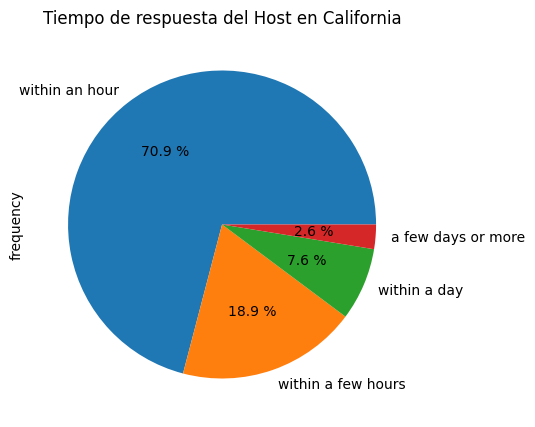

In [137]:
Cali_tabla1_index['frequency'].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")
plt.title('Tiempo de respuesta del Host en California')

Text(0.5, 1.0, 'Tiempo de respuesta del Host en el DF')

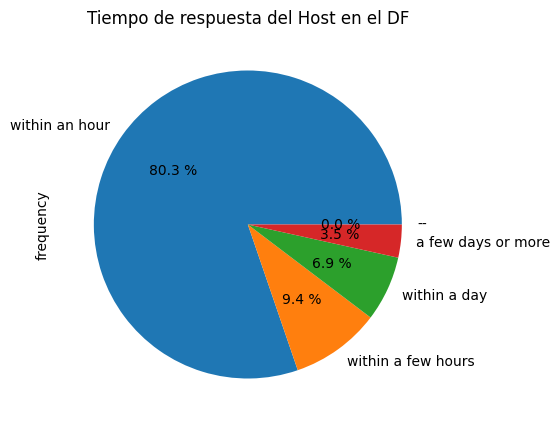

In [138]:
Mex_tabla1_index['frequency'].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")
plt.title('Tiempo de respuesta del Host en el DF')

Text(0.5, 1.0, 'Tiempo de respuesta del Host en Girona')

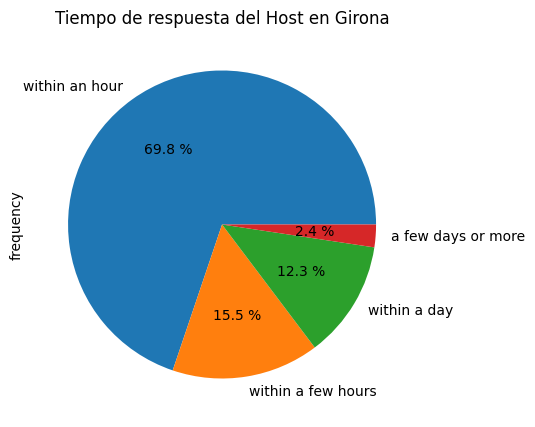

In [139]:
Gir_tabla1_index['frequency'].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")
plt.title('Tiempo de respuesta del Host en Girona')

### i) review_scores_location

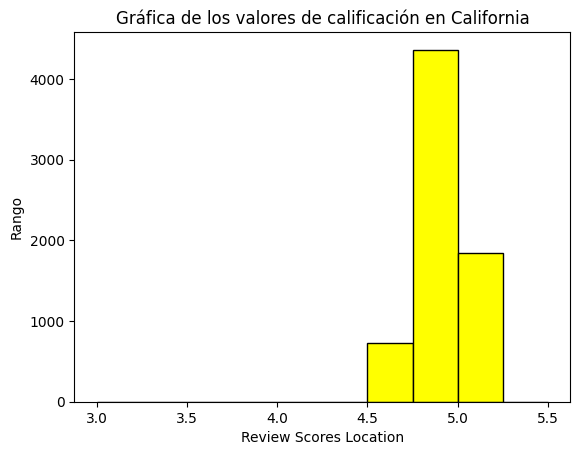

In [140]:
scores = california['review_scores_location']
range = [3,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5]
plt.hist(scores, bins=range, edgecolor='black', color = 'yellow')

plt.xlabel('Review Scores Location')
plt.ylabel('Rango')
plt.title('Gráfica de los valores de calificación en California')

plt.show()

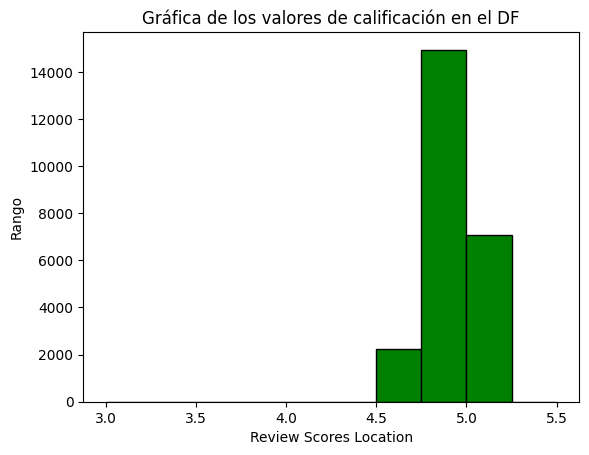

In [141]:
scores = df['review_scores_location']
range = [3,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5]
plt.hist(scores, bins=range, edgecolor='black', color = 'green')

plt.xlabel('Review Scores Location')
plt.ylabel('Rango')
plt.title('Gráfica de los valores de calificación en el DF')

plt.show()

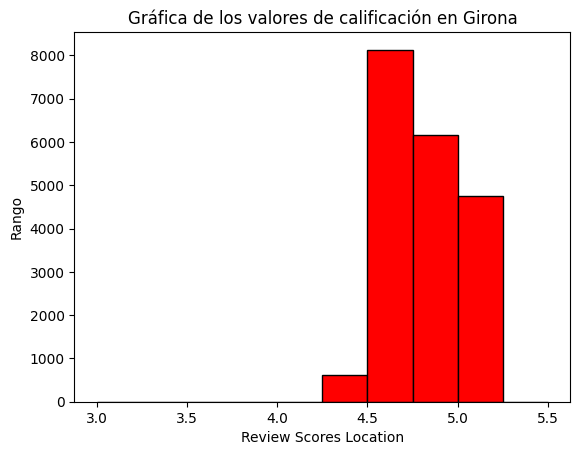

In [142]:
scores = girona['review_scores_location']
range = [3,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5]
plt.hist(scores, bins=range, edgecolor='black', color = 'red')

plt.xlabel('Review Scores Location')
plt.ylabel('Rango')
plt.title('Gráfica de los valores de calificación en Girona')

plt.show()

### c) host_identity_verified

In [143]:
Cali_tabla3= freq_tbl(california['host_identity_verified'])
Cali_tabla3_index= Cali_tabla3.set_index('host_identity_verified')
#tabla3
Cali_tabla3_index

,frequency,percentage,cumulative_perc
host_identity_verified,,,
t,6106,0.880334,0.880334
f,830,0.119666,1.000000


In [144]:
Mex_tabla3= freq_tbl(df['host_identity_verified'])
Mex_tabla3_index= Mex_tabla3.set_index('host_identity_verified')
#tabla3
Mex_tabla3_index

,frequency,percentage,cumulative_perc
host_identity_verified,,,
t,22301,0.920616,0.920616
f,1923,0.079384,1.000000


In [145]:
Gir_tabla3= freq_tbl(girona['host_identity_verified'])
Gir_tabla3_index= Gir_tabla3.set_index('host_identity_verified')
#tabla3
Gir_tabla3_index

,frequency,percentage,cumulative_perc
host_identity_verified,,,
t,17387,0.88461,0.88461
f,2268,0.11539,1.00000


Text(0.5, 1.0, 'Host Verificado en California')

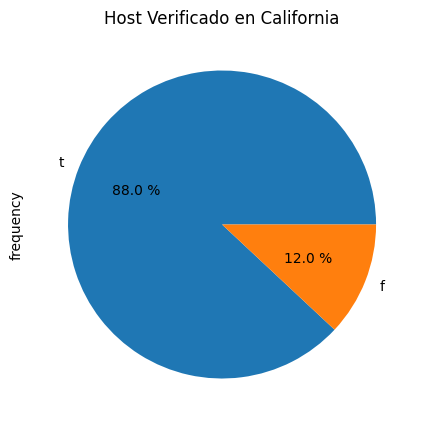

In [146]:
Cali_tabla3_index['frequency'].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")
plt.title('Host Verificado en California')

Text(0.5, 1.0, 'Host Verificado en el DF')

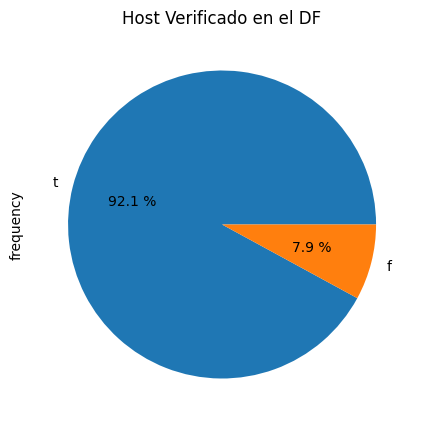

In [147]:
Mex_tabla3_index['frequency'].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")
plt.title('Host Verificado en el DF')

Text(0.5, 1.0, 'Host Verificado en Girona')

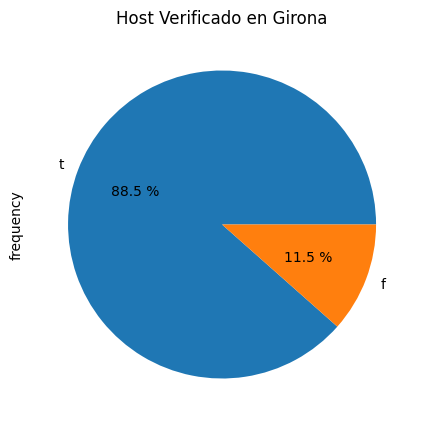

In [148]:
Gir_tabla3_index['frequency'].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")
plt.title('Host Verificado en Girona')

### d) property_type

In [149]:
Cali_tabla4= freq_tbl(california['property_type'])
Cali_tabla4= Cali_tabla4[Cali_tabla4['frequency']>30]
Cali_tabla4_index= Cali_tabla4.set_index('property_type')
#tabla4
Cali_tabla4_index

,frequency,percentage,cumulative_perc
property_type,,,
Entire rental unit,1848,0.266436,0.266436
Entire condo,879,0.126730,0.393166
Private room in home,853,0.122982,0.516148
Entire home,839,0.120963,0.637111
Entire guest suite,495,0.071367,0.708478
Private room in rental unit,471,0.067907,0.776384
Room in boutique hotel,352,0.050750,0.827134
Room in hotel,265,0.038206,0.865340
Private room in condo,192,0.027682,0.893022


In [150]:
Mex_tabla4= freq_tbl(df['property_type'])
Mex_tabla4= Mex_tabla4[Mex_tabla4['frequency']>30]
Mex_tabla4_index= Mex_tabla4.set_index('property_type')
#tabla4
Mex_tabla4_index

,frequency,percentage,cumulative_perc
property_type,,,
Entire rental unit,8145,0.336237,0.336237
Entire condo,3363,0.138829,0.475066
Private room in rental unit,2860,0.118065,0.593131
Private room in home,2009,0.082934,0.676065
Entire loft,1584,0.065390,0.741455
Entire serviced apartment,1067,0.044047,0.785502
Private room in condo,917,0.037855,0.823357
Entire home,661,0.027287,0.850644
Room in hotel,381,0.015728,0.866372


In [151]:
Gir_tabla4= freq_tbl(girona['property_type'])
Gir_tabla4= Gir_tabla4[Gir_tabla4['frequency']>30]
Gir_tabla4_index= Gir_tabla4.set_index('property_type')
#tabla4
Gir_tabla4_index

,frequency,percentage,cumulative_perc
property_type,,,
Entire rental unit,9339,0.475146,0.475146
Entire home,3703,0.188400,0.663546
Entire villa,1715,0.087255,0.750801
Entire condo,1400,0.071229,0.822030
Entire cottage,549,0.027932,0.849962
Entire townhouse,453,0.023048,0.873009
Entire loft,217,0.011040,0.884050
Room in hotel,184,0.009361,0.893411
Private room in bed and breakfast,179,0.009107,0.902518


Text(0, 0.5, 'Frecuencia')

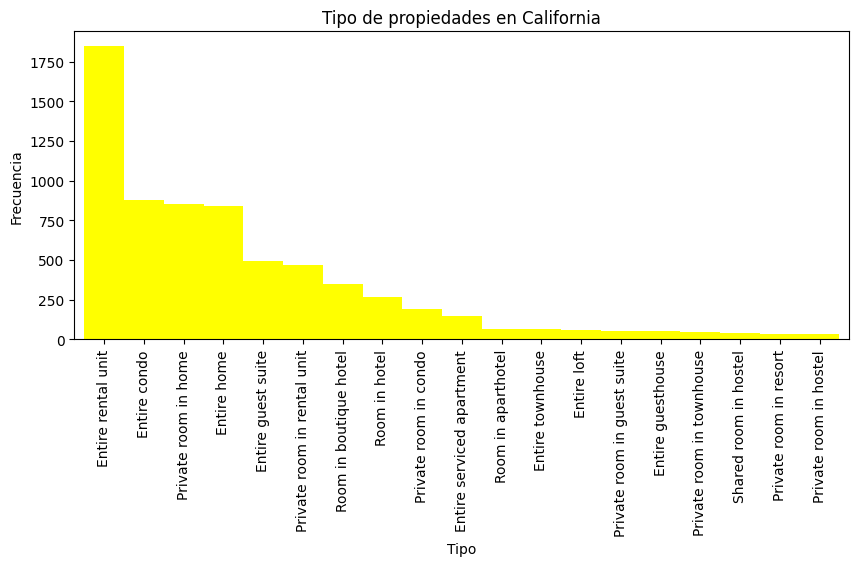

In [158]:
Cali_tabla4_index['frequency'].plot(kind = 'bar', width=1, figsize=(10,4), color= 'yellow')
plt.title('Tipo de propiedades en California')
plt.xlabel('Tipo')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

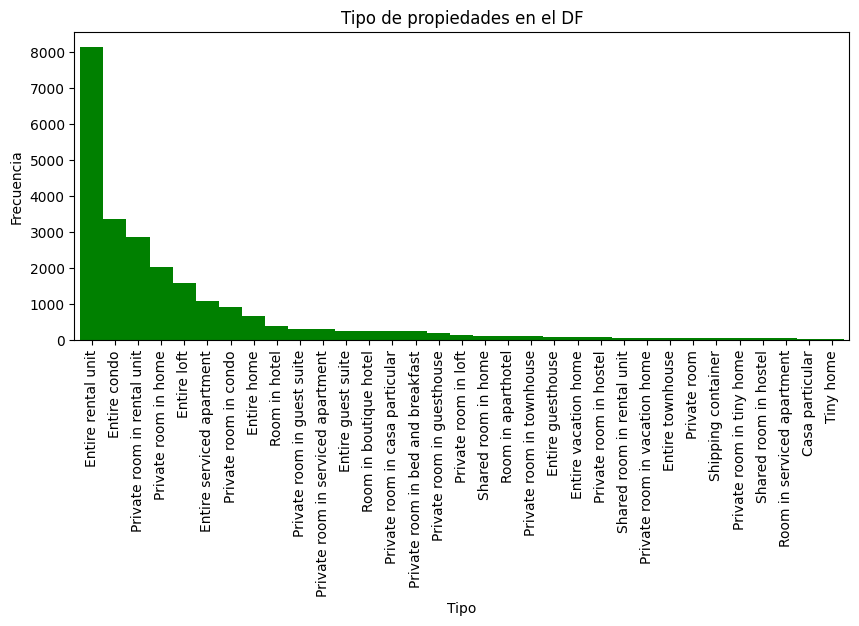

In [153]:
Mex_tabla4_index['frequency'].plot(kind = 'bar', width=1, figsize=(10,4), color= 'green')
plt.title('Tipo de propiedades en el DF')
plt.xlabel('Tipo')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

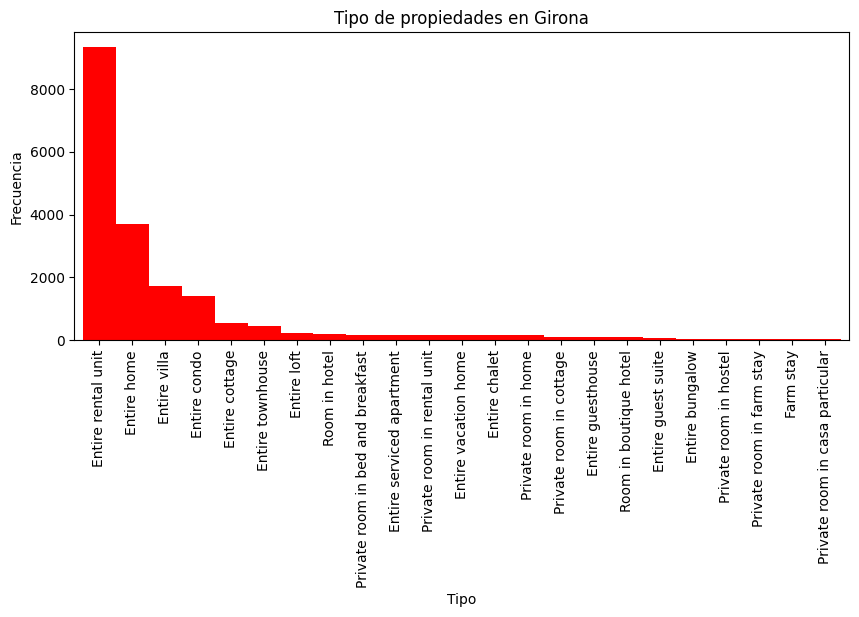

In [159]:
Gir_tabla4_index['frequency'].plot(kind = 'bar', width=1, figsize=(10,4), color= 'red')
plt.title('Tipo de propiedades en Girona')
plt.xlabel('Tipo')
plt.ylabel('Frecuencia')

### j) review_scores_value

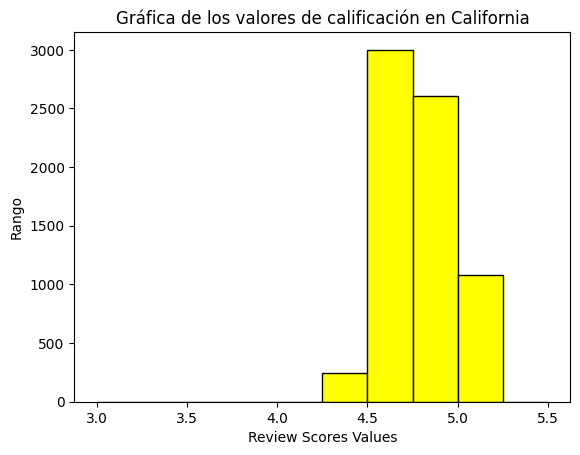

In [155]:
scores = california['review_scores_value']
range = [3,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5]
plt.hist(scores, bins=range, edgecolor='black', color = 'yellow')

plt.xlabel('Review Scores Values')
plt.ylabel('Rango')
plt.title('Gráfica de los valores de calificación en California')

plt.show()

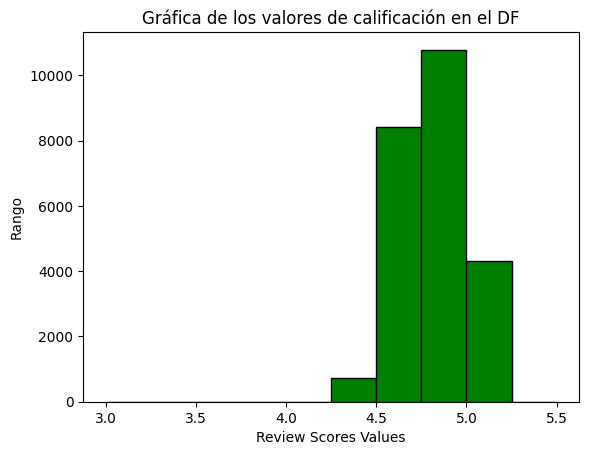

In [156]:
scores = df['review_scores_value']
range = [3,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5]
plt.hist(scores, bins=range, edgecolor='black', color = 'green')

plt.xlabel('Review Scores Values')
plt.ylabel('Rango')
plt.title('Gráfica de los valores de calificación en el DF')

plt.show()

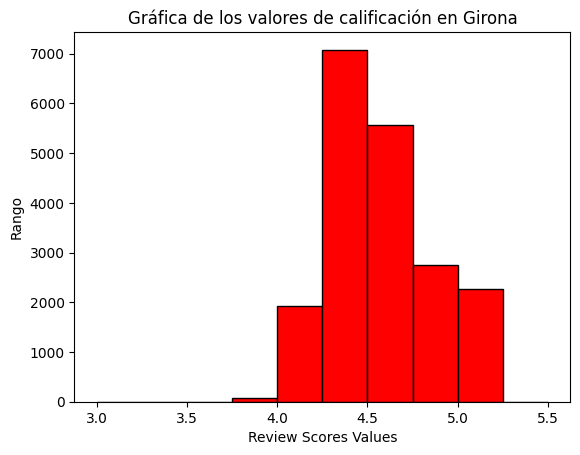

In [157]:
scores = girona['review_scores_value']
range = [3,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5]
plt.hist(scores, bins=range, edgecolor='black', color = 'red')

plt.xlabel('Review Scores Values')
plt.ylabel('Rango')
plt.title('Gráfica de los valores de calificación en Girona')

plt.show()